# Ejemplo de Análisis Exploratorio de Datos

## Programacion Avanzada - Python <br>

Docente: Cristian Guarnizo

A continuacion importamos la librerias que necesitamos para este notebook.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Auto MPG Dataset
Esta base de datos se emplea para hacer prediccion (modelo de regresion) a partir del peso, potencia, cilindraje y desplazamiento de diferentes tipos de vehiculos.

Usamos la libreria Pandas para obtener una descrpicion estadistica del conjunto de datos. La descripcion de esta base de datos puede ser encontrada en [UCI_MGP_data_link](https://archive.ics.uci.edu/ml/datasets/auto+mpg). Continuamos definiendo los nombres de las columnas y leemos los valores del archivo que descargamos.

In [6]:
URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
dataset = pd.read_csv(URL, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [8]:
dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


Revisamos si los datos contienen valores "nan". Si es asi, los eliminamos. La siguiente linea de comando nos indica cuantos registros son "nan".

In [10]:
dataset.isna().sum()

,0
MPG,0
Cylinders,0
Displacement,0
Horsepower,6
Weight,0
Acceleration,0
Model Year,0
Origin,0


Para mantener este ejemplo sencillo, eliminamos las final con "nan" ejecutando la siguiente linea.

In [11]:
dataset = dataset.dropna()

La columna "Origin" usa un valor entero para representa el pais donde el carro fue construido. Cambiamos esto por una representación "one-hot". Entonces, extraemos la columna Origin y la reemplazamos con tres nuevamos columnas que indican cada pais.

In [20]:
origin = dataset.pop('Origin')

dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

<ipython-input-20-104c4979b804>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['USA'] = (origin == 1)*1.0
<ipython-input-20-104c4979b804>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Europe'] = (origin == 2)*1.0
<ipython-input-20-104c4979b804>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


## Analisis Exploratorio de los datos

Ahora observamos las relaciones de que existen entre los datos, por medio de un scatter plot, donde en la diagonal estimamos la densidad de probabilidad por medio de KDE (Kernel Density Estimatio).

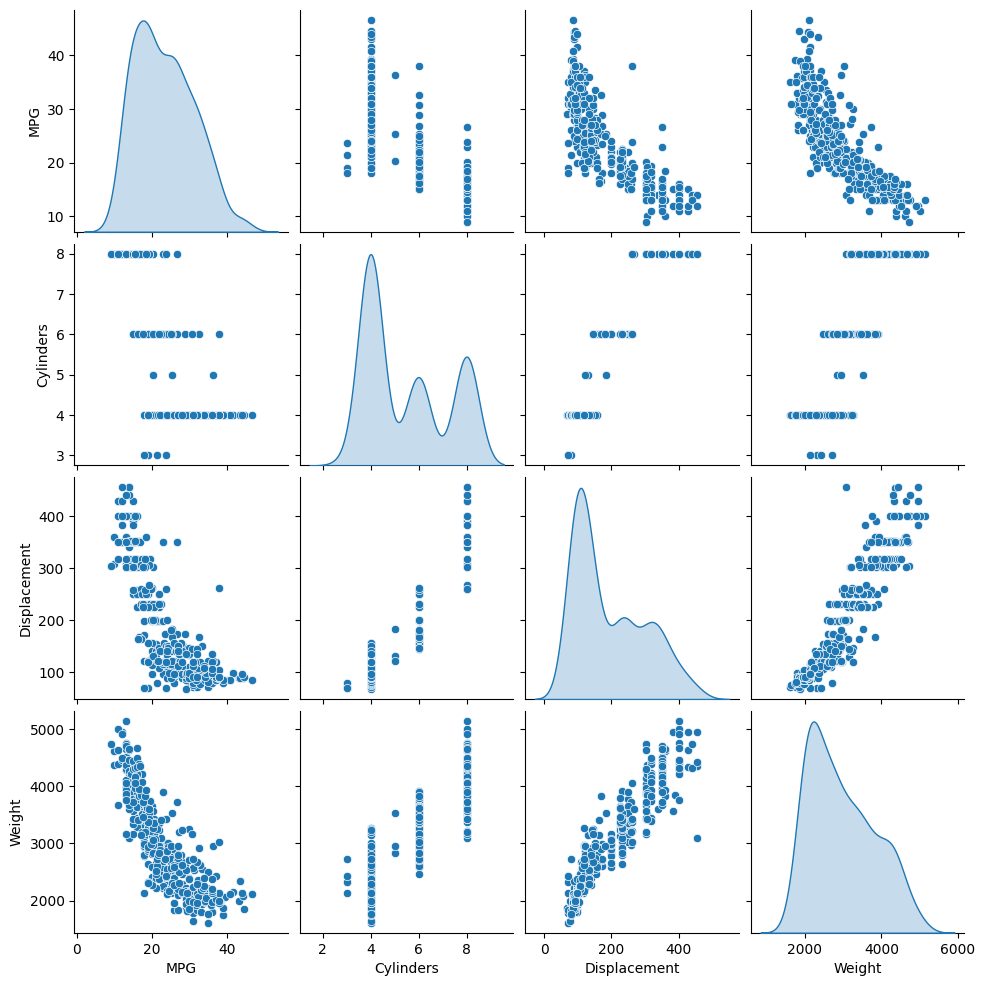

In [14]:
sns.pairplot(dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

La variable que tipicamente se emplea para predicción es MPG. Ahora observamos las correlaciones que existen entre todas la variables.

---



[]

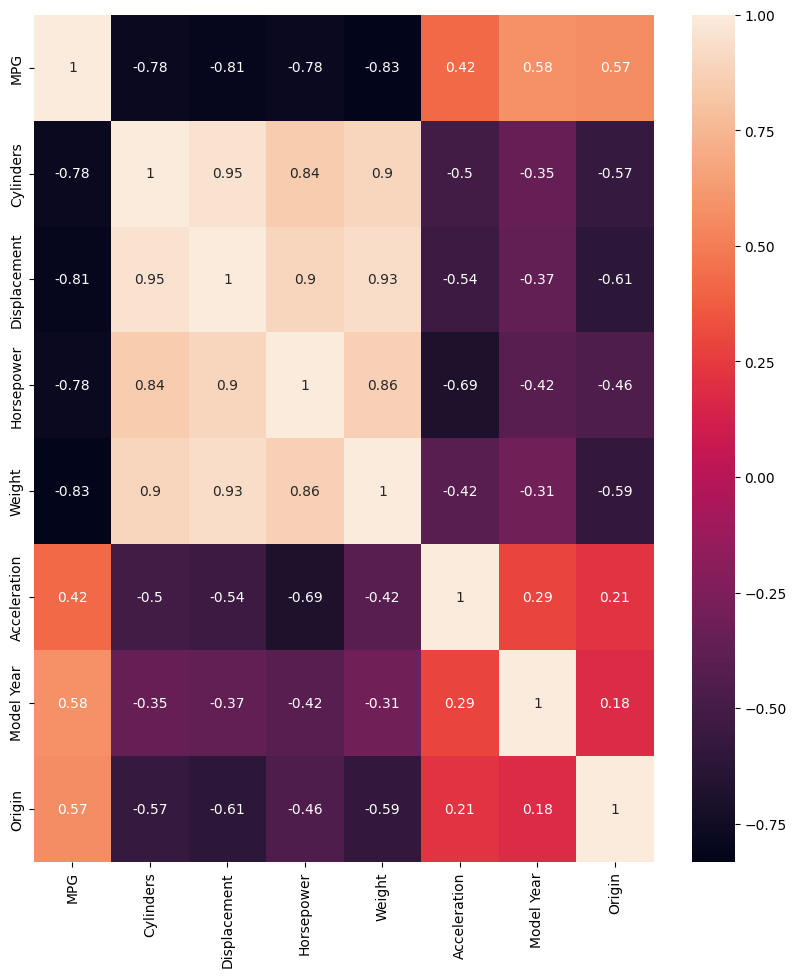

In [15]:
plt.figure(figsize=(10,11))
sns.heatmap(dataset.corr(), annot=True)
plt.plot()

Ahora analizamos con BoxPlots el comportamiento de cada variable.

<Axes: >

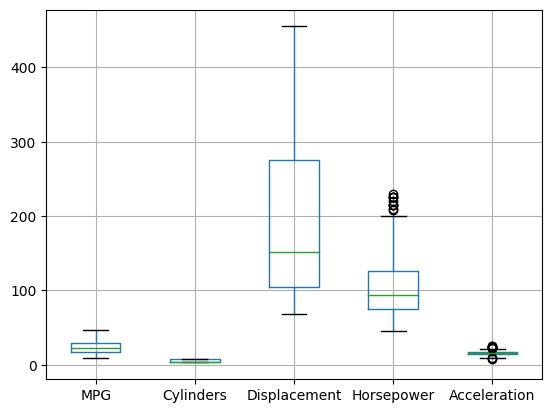

In [16]:
dataset.boxplot(column=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Acceleration'])

<Axes: >

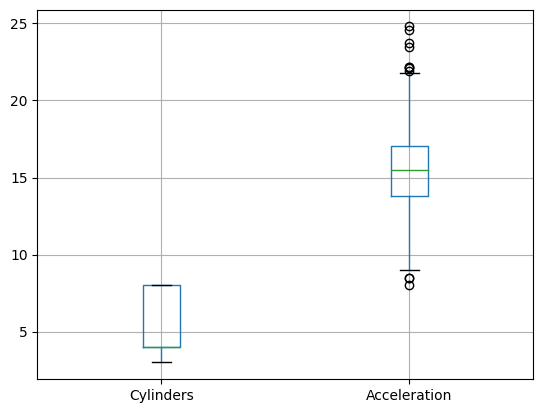

In [17]:
dataset.boxplot(column=['Cylinders', 'Acceleration'])

In [18]:
dataset[dataset['Horsepower']>200]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
6,14.0,8,454.0,220.0,4354.0,9.0,70,1
7,14.0,8,440.0,215.0,4312.0,8.5,70,1
8,14.0,8,455.0,225.0,4425.0,10.0,70,1
13,14.0,8,455.0,225.0,3086.0,10.0,70,1
25,10.0,8,360.0,215.0,4615.0,14.0,70,1
27,11.0,8,318.0,210.0,4382.0,13.5,70,1
67,11.0,8,429.0,208.0,4633.0,11.0,72,1
94,13.0,8,440.0,215.0,4735.0,11.0,73,1
95,12.0,8,455.0,225.0,4951.0,11.0,73,1
116,16.0,8,400.0,230.0,4278.0,9.5,73,1


## Analisis por agrupamiento
Queremos obtener la media de MPG por Origen de construccion

In [21]:
MPGmean = dataset.groupby(origin)

In [24]:
MPGmean.get_group(3) # dataset[origin==3]

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
14,24.0,4,113.0,95.0,2372.0,15.0,70,0.0,0.0,1.0
18,27.0,4,97.0,88.0,2130.0,14.5,70,0.0,0.0,1.0
29,27.0,4,97.0,88.0,2130.0,14.5,71,0.0,0.0,1.0
31,25.0,4,113.0,95.0,2228.0,14.0,71,0.0,0.0,1.0
53,31.0,4,71.0,65.0,1773.0,19.0,71,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
382,34.0,4,108.0,70.0,2245.0,16.9,82,0.0,0.0,1.0
383,38.0,4,91.0,67.0,1965.0,15.0,82,0.0,0.0,1.0
384,32.0,4,91.0,67.0,1965.0,15.7,82,0.0,0.0,1.0
385,38.0,4,91.0,67.0,1995.0,16.2,82,0.0,0.0,1.0


<Axes: xlabel='Origin'>

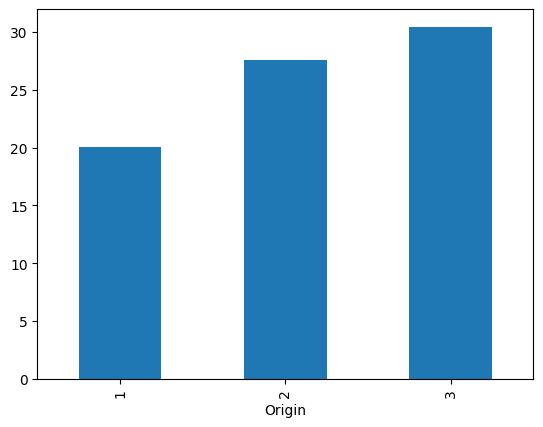

In [31]:
MPGmean['MPG'].mean().plot.bar()

,Horsepower
Origin,
1,"Axes(0.125,0.11;0.775x0.77)"
2,"Axes(0.125,0.11;0.775x0.77)"
3,"Axes(0.125,0.11;0.775x0.77)"


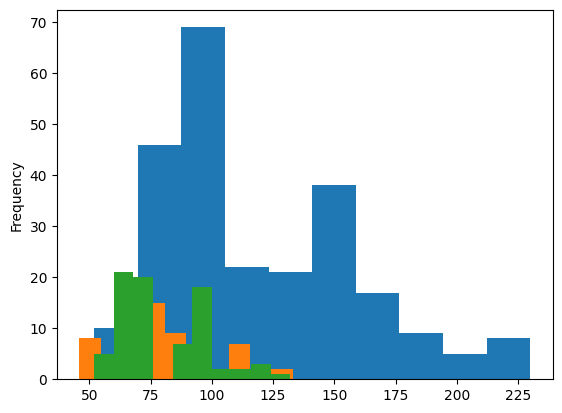

In [32]:
MPGmean['Horsepower'].plot.hist()

### Filtrando los datos de USA
Queremos graficar el histograma de Horsepower solo de los datos de USA.

<Axes: ylabel='Frequency'>

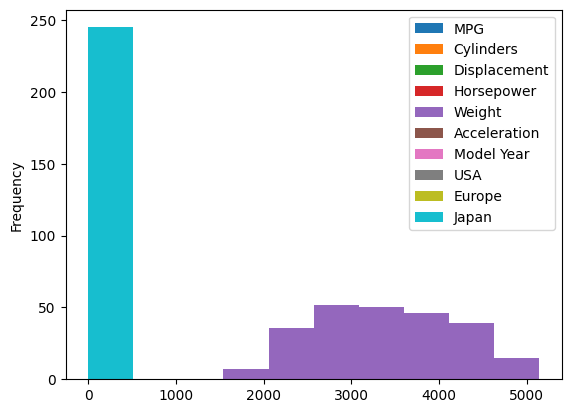

In [ ]:
dataset[dataset['USA']==1].plot.hist()

<Axes: ylabel='Frequency'>

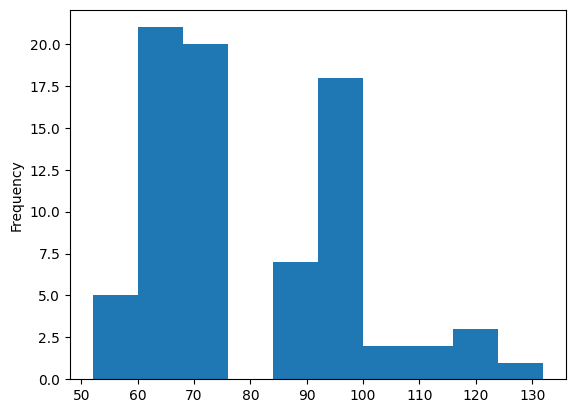

In [35]:
dataset[origin==3]['Horsepower'].plot.hist()

### Determinar valores maximos y minimos
Podemos hacer uso de los comandos `min` y `max`, como tambien de los comando `argmax` y `argmin`.

In [36]:
print('Ubicacion del maximo :', dataset['MPG'].argmax())
print('Valor del maximo :', dataset['MPG'].max())

Ubicacion del maximo : 320
Valor del maximo : 46.6


In [37]:
dataset.loc[320,:]

,320
MPG,37.0
Cylinders,4.0
Displacement,119.0
Horsepower,92.0
Weight,2434.0
Acceleration,15.0
Model Year,80.0
USA,0.0
Europe,0.0
Japan,1.0


# Ejercicio
1. Determinar el valor maximo y minimo de Horsepower para cada Origen. a) Filtrando los datos. b) Usando `groupby`.

In [ ]:
#Hacer codigo aqui

2. Determinar el numero de los registro (fila) donde estan ubicados los maximos y minimos de MPG, Horsepower y Acceleration. Indicar cual es el año del modelo y el pais de origen en cada caso.

3. Determinar cuantas mujeres menores de edad sobrevivieron al accidente de titanic

In [ ]:
URL = 'https://raw.githubusercontent.com/datasciencedojo/datasets/refs/heads/master/titanic.csv'


4. Agrupar los datos por clase y hacer un grafico de barras con la cantidad de sobrevivientes por clase.